<a href="https://colab.research.google.com/github/ycchen328/demo_1/blob/main/Tutorial_4_questions_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# Mounting
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [15]:
import pandas as pd
data = pd.read_csv('/content/drive/My Drive/healthcare-dataset-stroke-data (1).csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
3,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
4,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1


Which gender has more strokes (Use countplot to visualise your answers)

In [16]:
#Reading csv file
f = open('/content/drive/My Drive/healthcare-dataset-stroke-data (1).csv', 'r')
lines = f.readlines()
lines2 = []

for line in lines:

  #.strip allows you to remove the whitespace from the beginning or end of the string
  line = line.strip()
  lines2.append(line)

print(lines2)
f.close()

['id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke', '9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1', '51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1', '31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1', '60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1', '1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1', '56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1', '53882,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1', '10434,Female,69,0,0,No,Private,Urban,94.39,22.8,never smoked,1', '27419,Female,59,0,0,Yes,Private,Rural,76.15,N/A,Unknown,1', '60491,Female,78,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1', '12109,Female,81,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1', '12095,Female,61,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1', '12175,Female,54,0,0,Yes,Private,Urban,104.51,27.3,smokes,1', '8213,Male,78,0,1,Ye

In [18]:
#Tokenisation
ep_curve = []
for line in lines2:
  ep ={}

  #.split allows you to split a string into a list, default seperator is any whitespace
  tokens = line.split(',')
  date = tokens[0]
  type_ep = tokens[1]
  value = str(tokens[2])

  #Set the key-value pairs in our dictionary ep

  ep['date'] = date
  ep['type_ep'] = type_ep
  ep['value'] = value
  ep_curve.append(ep)

print(ep_curve)

[{'date': 'id', 'type_ep': 'gender', 'value': 'age'}, {'date': '9046', 'type_ep': 'Male', 'value': '67'}, {'date': '51676', 'type_ep': 'Female', 'value': '61'}, {'date': '31112', 'type_ep': 'Male', 'value': '80'}, {'date': '60182', 'type_ep': 'Female', 'value': '49'}, {'date': '1665', 'type_ep': 'Female', 'value': '79'}, {'date': '56669', 'type_ep': 'Male', 'value': '81'}, {'date': '53882', 'type_ep': 'Male', 'value': '74'}, {'date': '10434', 'type_ep': 'Female', 'value': '69'}, {'date': '27419', 'type_ep': 'Female', 'value': '59'}, {'date': '60491', 'type_ep': 'Female', 'value': '78'}, {'date': '12109', 'type_ep': 'Female', 'value': '81'}, {'date': '12095', 'type_ep': 'Female', 'value': '61'}, {'date': '12175', 'type_ep': 'Female', 'value': '54'}, {'date': '8213', 'type_ep': 'Male', 'value': '78'}, {'date': '5317', 'type_ep': 'Female', 'value': '79'}, {'date': '58202', 'type_ep': 'Female', 'value': '50'}, {'date': '56112', 'type_ep': 'Male', 'value': '64'}, {'date': '34120', 'type_ep'

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data = pd.read_csv('/content/drive/My Drive/healthcare-dataset-stroke-data (1).csv')
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [26]:
print(type(data['gender']))

<class 'pandas.core.series.Series'>


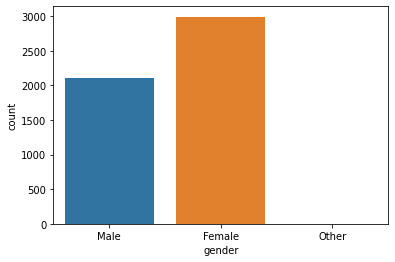

In [27]:
sns.countplot(x = data['gender'], data = data)
plt.show()

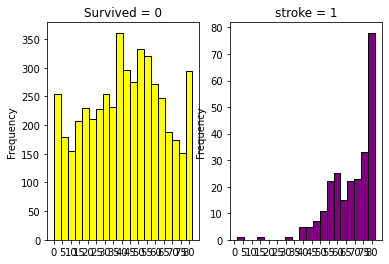

In [31]:
#import warnings 
#warnings.filterwarnings('ignore')

fig, ax = plt.subplots(1, 2)
data[data['stroke']== 0].age.plot.hist(ax=ax[0], bins =20 , edgecolor = 'black', color = 'yellow')
ax[0].set_title('Survived = 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

data[data['stroke'] == 1].age.plot.hist(ax=ax[1], bins =20 , edgecolor = 'black', color = 'purple')
ax[1].set_title('stroke = 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)

plt.show()


In [36]:
data['bmi'].fillna(value=data['bmi'].mean(), inplace=True)
print('Updated Dataframe:')
print(data)

Updated Dataframe:
         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
0           Private          Urban             228.69  36.60

In [39]:
import pandas as pd
corr_matrix = data.corr()
print(corr_matrix)

                         id       age  hypertension  heart_disease  \
id                 1.000000  0.003538      0.003550      -0.001296   
age                0.003538  1.000000      0.276398       0.263796   
hypertension       0.003550  0.276398      1.000000       0.108306   
heart_disease     -0.001296  0.263796      0.108306       1.000000   
avg_glucose_level  0.001092  0.238171      0.174474       0.161857   
bmi                0.002999  0.325942      0.160189       0.038899   
stroke             0.006388  0.245257      0.127904       0.134914   

                   avg_glucose_level       bmi    stroke  
id                          0.001092  0.002999  0.006388  
age                         0.238171  0.325942  0.245257  
hypertension                0.174474  0.160189  0.127904  
heart_disease               0.161857  0.038899  0.134914  
avg_glucose_level           1.000000  0.168751  0.131945  
bmi                         0.168751  1.000000  0.038947  
stroke                    

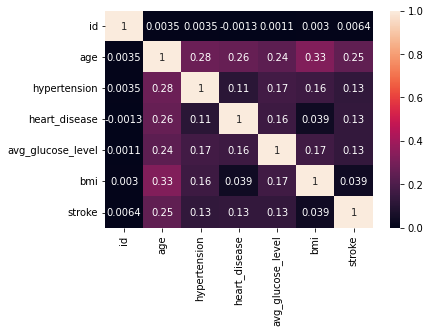

In [42]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

corr_matrix = data.corr()
sn.heatmap(corr_matrix, annot=True)
plt.show()